# **Daily Minimum Temperatures Dataset**

## **0. Tải bộ dữ liệu**

In [22]:
!gdown 1PWPwhW8QNOhPSOA1AtT7cu8-Uaxwo5UX

Downloading...
From: https://drive.google.com/uc?id=1PWPwhW8QNOhPSOA1AtT7cu8-Uaxwo5UX
To: /content/timeseries_daily-minimum-temperatures.csv
100% 55.9k/55.9k [00:00<00:00, 83.5MB/s]


## **1. Import thư viện và load dataset**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
DATASET_PATH = './timeseries_daily-minimum-temperatures.csv'

# Read data from .csv file
ts_df = pd.read_csv(DATASET_PATH)

print(ts_df.shape)
print(ts_df.dtypes)
ts_df.head(3)

(3650, 2)
Date                          object
Daily minimum temperatures    object
dtype: object


,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8


In [25]:
ts_df['Date'] = pd.to_datetime(ts_df['Date'])
ts_df = ts_df.set_index('Date')
ts_df.head(3)

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [26]:
ts_df = pd.read_csv(DATASET_PATH, index_col=0, parse_dates=True)

ts_df['Year'] = ts_df.index.year
ts_df['Month'] = ts_df.index.month
ts_df['Weekday Name'] = ts_df.index.day_name()

ts_df.sample(5, random_state=0)

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1990-08-20,9.7,1990,8,Monday
1982-07-24,6.6,1982,7,Saturday
1983-09-19,12,1983,9,Monday
1986-09-28,6.9,1986,9,Sunday
1988-01-12,18.3,1988,1,Tuesday


In [27]:
ts_df.dtypes

,0
Daily minimum temperatures,object
Year,int32
Month,int32
Weekday Name,object


In [28]:
ts_df['Daily minimum temperatures'] = pd.to_numeric(
    ts_df['Daily minimum temperatures'], errors='coerce')
ts_df.dtypes

,0
Daily minimum temperatures,float64
Year,int32
Month,int32
Weekday Name,object


## **2. Time-based indexing**

In [29]:
ts_df.loc['1990-01-01':'1991-01-01']

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1990-01-01,14.8,1990,1,Monday
1990-01-02,13.3,1990,1,Tuesday
1990-01-03,15.6,1990,1,Wednesday
1990-01-04,14.5,1990,1,Thursday
1990-01-05,14.3,1990,1,Friday
...,...,...,...,...
1990-12-27,14.0,1990,12,Thursday
1990-12-28,13.6,1990,12,Friday
1990-12-29,13.5,1990,12,Saturday


In [30]:
ts_df.loc['1990-01']

,Daily minimum temperatures,Year,Month,Weekday Name
Date,,,,
1990-01-01,14.8,1990,1,Monday
1990-01-02,13.3,1990,1,Tuesday
1990-01-03,15.6,1990,1,Wednesday
1990-01-04,14.5,1990,1,Thursday
1990-01-05,14.3,1990,1,Friday
1990-01-06,15.3,1990,1,Saturday
1990-01-07,16.4,1990,1,Sunday
1990-01-08,14.8,1990,1,Monday
1990-01-09,17.4,1990,1,Tuesday


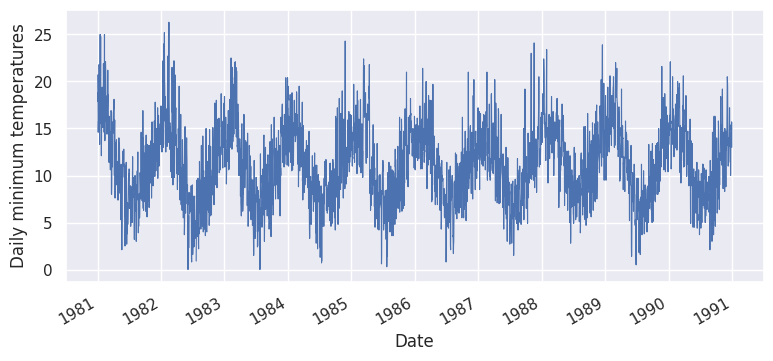

In [31]:
sns.set(rc={'figure.figsize':(9, 4)})
col_to_plot = 'Daily minimum temperatures'
ts_df[col_to_plot].plot(linewidth=0.8)
plt.ylabel(col_to_plot)
plt.show()

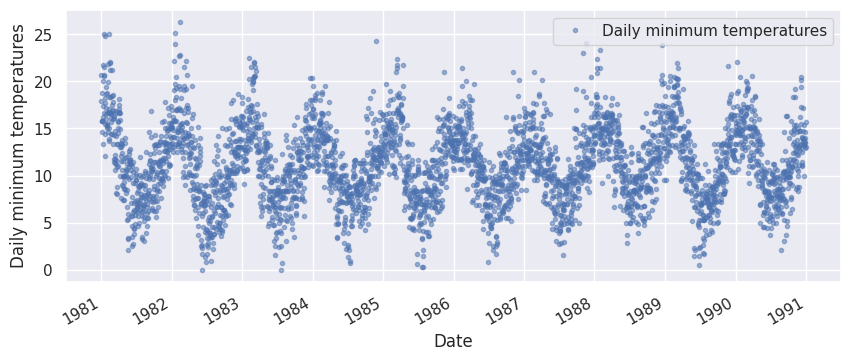

In [32]:
cols_plot = ['Daily minimum temperatures']
ts_df[cols_plot].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(10, 4),
    subplots=True
)
plt.ylabel('Daily minimum temperatures')
plt.show()

## **4. Seasonality**



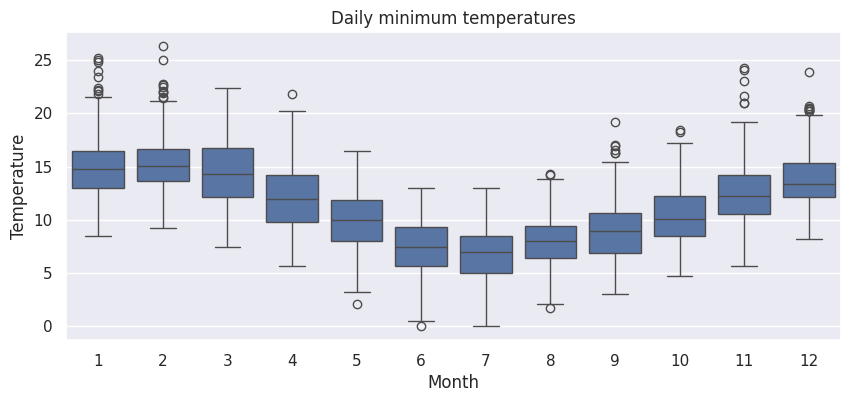

In [33]:
COL_NAME = 'Daily minimum temperatures'
plt.figure(figsize=(10, 4))
sns.boxplot(data=ts_df, x='Month', y=COL_NAME)
plt.ylabel('Temperature')
plt.title(COL_NAME)
plt.show()

## **5. Frequencies**

In [34]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2004-09-20', periods=8, freq='h')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [36]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['1981-01-01', '1981-01-04', '1981-01-08'])
# Select the specified dates and just the Consumption column
consum_sample = ts_df.loc[times_sample, ['Daily minimum temperatures']].copy()
consum_sample

,Daily minimum temperatures
1981-01-01,20.7
1981-01-04,14.6
1981-01-08,17.4


In [37]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Daily minimum temperatures - Forward Fill'] = consum_sample.asfreq(
    'D', method='ffill')
consum_freq

,Daily minimum temperatures,Daily minimum temperatures - Forward Fill
1981-01-01,20.7,20.7
1981-01-02,NaN,20.7
1981-01-03,NaN,20.7
1981-01-04,14.6,14.6
1981-01-05,NaN,14.6
1981-01-06,NaN,14.6
1981-01-07,NaN,14.6
1981-01-08,17.4,17.4


## **6. Resampling**

In [38]:
data_columns = ['Daily minimum temperatures']
ts_weekly_mean = ts_df[data_columns].resample('W').mean()
ts_weekly_mean.head(3)

,Daily minimum temperatures
Date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429


In [39]:
print(ts_df.shape[0])
print(ts_weekly_mean.shape[0])

3650
523


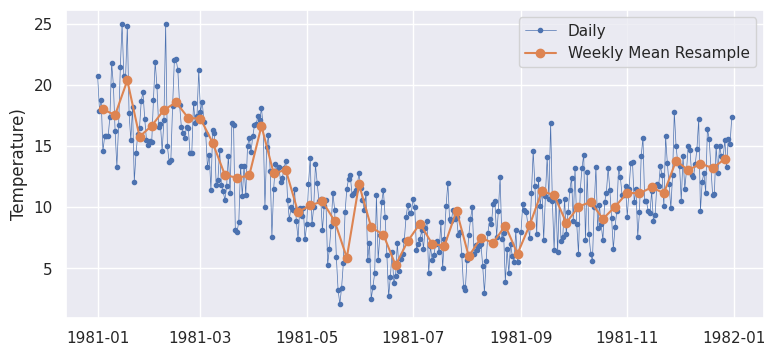

In [40]:
# Start and end of the date range to extract
start, end = '1981-01', '1981-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(ts_df.loc[start:end, 'Daily minimum temperatures'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ts_weekly_mean.loc[start:end, 'Daily minimum temperatures'],
marker='o', linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature)')
ax.legend()
plt.show()

In [41]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
ts_annual_df = ts_df[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year
# to the year component
ts_annual_df = ts_annual_df.set_index(ts_annual_df.index.year)
ts_annual_df.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
ts_annual_df.tail(3)

/tmp/ipython-input-3750515818.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_annual_df = ts_df[data_columns].resample('A').sum(min_count=360)


,Daily minimum temperatures
Year,
1988,4369.8
1989,4110.6
1990,4259.4


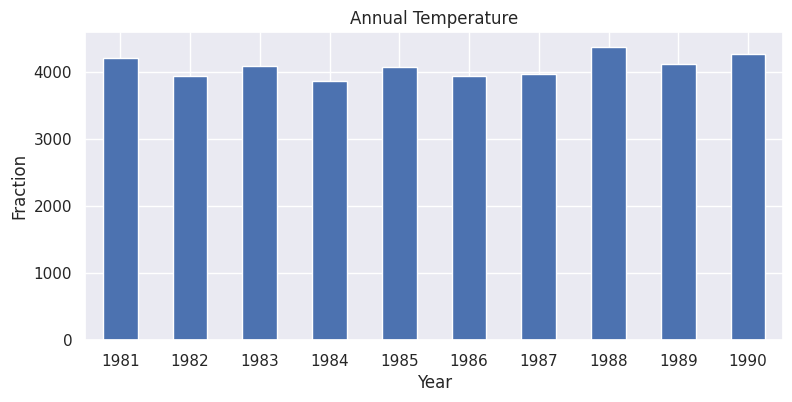

In [42]:
# Plot from 1981 onwards, because there is no solar production data in earlier years
ax = ts_annual_df.loc[1981:, 'Daily minimum temperatures'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_title('Annual Temperature')
plt.xticks(rotation=0)
plt.show()